# NLP Project on PoS Tagging
In this project we aim to apply parts-of-speech tagging on two texts. For this purpose, we will first have to apply preprocessing such as removing runnung words & stop words, minimise all upper case letters, tokenise all the words, etc. We will also be doing analysis and visualization on the texts to get a better understanding and draw inferences.<br>
This code deals with the book The Kingmakers, by Burton E. Stevenson.

This project is completed by:
- Shivesh Kaundinya - 19UCS154
- Keshav Maheshwari - 19UCS060
- Roshan Kumar - 19UCS178

### Setting Up

In [25]:
import nltk                         # Has necessary modules for PoS Tagging
from nltk.corpus import stopwords   # Contains stop words that need to be removed
from nltk import pos_tag            # Used to perform PoS Tagging

import regex as re                  # Used for matching words in the text
import unidecode                    # To remove Greek accents

from wordcloud import WordCloud     # To generate worcloud
import matplotlib.pyplot as plt     # To display graphs related to data

### Reading the Book

In [16]:
book_name = "The Kingmakers, by Burton E. Stevenson.txt"
with open(book_name, encoding="utf-8") as book:
    lines = book.readlines()

print(lines[:10])

['\ufeffThe Project Gutenberg eBook of The Kingmakers, by Burton E. Stevenson\n', '\n', 'This eBook is for the use of anyone anywhere in the United States and\n', 'most other parts of the world at no cost and with almost no restrictions\n', 'whatsoever. You may copy it, give it away or re-use it under the terms\n', 'of the Project Gutenberg License included with this eBook or online at\n', 'www.gutenberg.org. If you are not located in the United States, you\n', 'will have to check the laws of the country where you are located before\n', 'using this eBook.\n', '\n']


### Preprocessing

In [17]:
# Extracting the main content from the text

begin_index = lines.index("CHAPTER I\n")
end_index = len(lines) - 1 - lines[::-1].index("THE END\n")
print("The main content is from line numbers {} to {}".format(begin_index, end_index))

lines = lines[begin_index:end_index]        # Reducing lines to main content

The main content is from line numbers 157 to 9729


In [18]:
# Removing chapter headings, part headings and empty lines

part_pattern = r"PART [IVX]+"
chapter_pattern = r"CHAPTER [IVX]+"

temp = []
for line in lines:
    is_valid = ((line == '\n') or re.match(part_pattern, line) or re.match(chapter_pattern, line))
    if(not is_valid):               # If the line is neither a chapter number nor a part heading nor an empty line
        temp.append(line)           # include it in the final list

lines = temp
print(lines[:10])


['THE COUNTESS RÉMOND\n', 'Selden, entering from the dining-room, saw that the lounge was crowded,\n', 'and he paused for a moment to look about him. It was the half-hour\n', 'between dinner and the Sporting Club, and he was pleasantly aware of\n', 'the odours of good coffee and super-excellent tobacco, mingled with the\n', 'delicate and very expensive perfumes rising from the clothes, the hair,\n', 'the shoulders of the women lying indolently back in the deep chairs.\n', 'It was the women who dominated the scene. There were men present, to be\n', 'sure, but they were as unobtrusive to the eye, as strictly utilitarian,\n', 'as the donor kneeling humbly in the corner of the picture before the\n']


In [27]:
# Removing special characters and combining all the lines into one string

joined_book = ''.join(lines)                            # Combining all the lines to a single string
joined_book = unidecode.unidecode(joined_book)          # Removing Greek accents
joined_book = joined_book.lower()                       # Turing all the characters to lower case
joined_book = re.sub('\s', '_', joined_book)            # Replacing spaces with '_'
joined_book = re.sub(r'\W+', '', joined_book)           # Removing non-alphanumeric characters
joined_book = re.sub('_', ' ', joined_book)             # Replacing '_' back to ' '

print(joined_book[:1000])
text_file = open("B1.txt", "w")

text_file.write(joined_book)

text_file.close()


the countess remond selden entering from the diningroom saw that the lounge was crowded and he paused for a moment to look about him it was the halfhour between dinner and the sporting club and he was pleasantly aware of the odours of good coffee and superexcellent tobacco mingled with the delicate and very expensive perfumes rising from the clothes the hair the shoulders of the women lying indolently back in the deep chairs it was the women who dominated the scene there were men present to be sure but they were as unobtrusive to the eye as strictly utilitarian as the donor kneeling humbly in the corner of the picture before the madonna he had paid to have painted these men were donors too of many things besides paintbut the resemblance ended there for there was nothing madonnalike about the women they differed in being blonde or brune of various contours and of all ages but some subtle quality of spirit bound them together in a common sisterhood their gowns ran the gamut of the rainbo

In [20]:
# Tokenising the string

nltk.download('punkt')
tokens = nltk.word_tokenize(joined_book)

print('The text contains {} words'.format(len(tokens)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91941\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The text contains 73693 words


### Analyzing the Text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91941\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


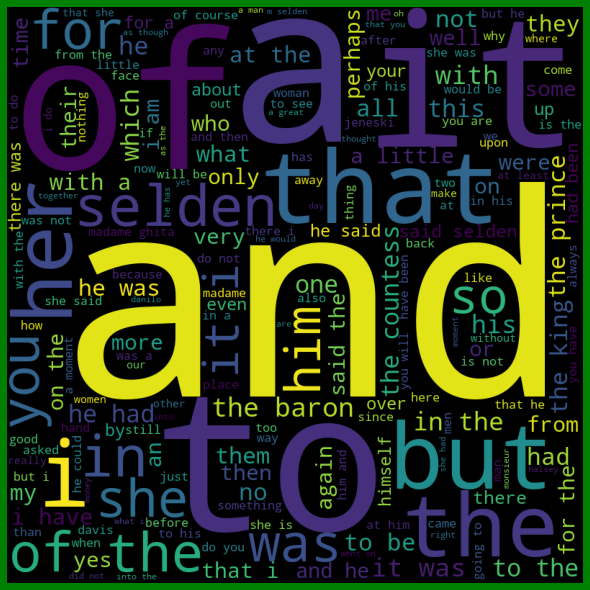

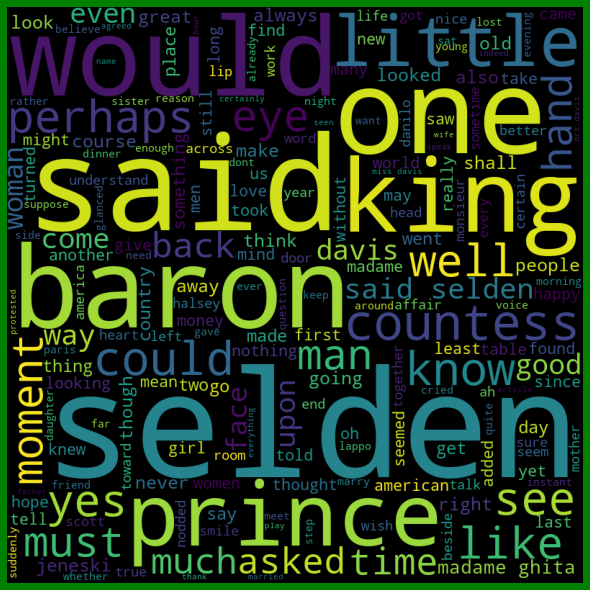

In [21]:
# Visualizing with wordcloud

def show_wordcloud(stopwords):
    wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10, stopwords=stopwords).generate(joined_book)
    plt.figure(figsize=(8, 8), facecolor='green')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

nltk.download('stopwords')
all_stopwords = stopwords.words('english')

show_wordcloud({',', '.', '-', '"'})        # Wordcloud with stopwords
show_wordcloud(all_stopwords)               # Wordcloud without stopwords

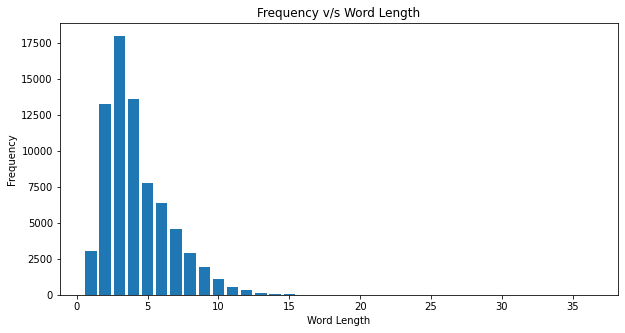

In [22]:
# Analyzing relation between word length and frequency 

wordlen_to_freq = {}

for token in tokens:
    length = len(token)
    if(length in wordlen_to_freq):
        wordlen_to_freq[length] += 1
    else:
        wordlen_to_freq[length] = 1

lists = sorted(wordlen_to_freq.items())
x, y = zip(*lists)
plt.bar(x, y)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Frequency v/s Word Length")
plt.show()


### Performing PoS Tagging

In [23]:
nltk.download('averaged_perceptron_tagger')
tagged_data = pos_tag(tokens)
print(tagged_data[:100])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91941\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('the', 'DT'), ('countess', 'NN'), ('remond', 'NN'), ('selden', 'JJ'), ('entering', 'NN'), ('from', 'IN'), ('the', 'DT'), ('diningroom', 'NN'), ('saw', 'VBD'), ('that', 'IN'), ('the', 'DT'), ('lounge', 'NN'), ('was', 'VBD'), ('crowded', 'VBN'), ('and', 'CC'), ('he', 'PRP'), ('paused', 'VBD'), ('for', 'IN'), ('a', 'DT'), ('moment', 'NN'), ('to', 'TO'), ('look', 'VB'), ('about', 'IN'), ('him', 'PRP'), ('it', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('halfhour', 'NN'), ('between', 'IN'), ('dinner', 'NN'), ('and', 'CC'), ('the', 'DT'), ('sporting', 'NN'), ('club', 'NN'), ('and', 'CC'), ('he', 'PRP'), ('was', 'VBD'), ('pleasantly', 'RB'), ('aware', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('odours', 'NNS'), ('of', 'IN'), ('good', 'JJ'), ('coffee', 'NN'), ('and', 'CC'), ('superexcellent', 'JJ'), ('tobacco', 'NN'), ('mingled', 'VBN'), ('with', 'IN'), ('the', 'DT'), ('delicate', 'NN'), ('and', 'CC'), ('very', 'RB'), ('expensive', 'JJ'), ('perfumes', 'NNS'), ('rising', 'VBG'), ('from', 'IN'), ('the',

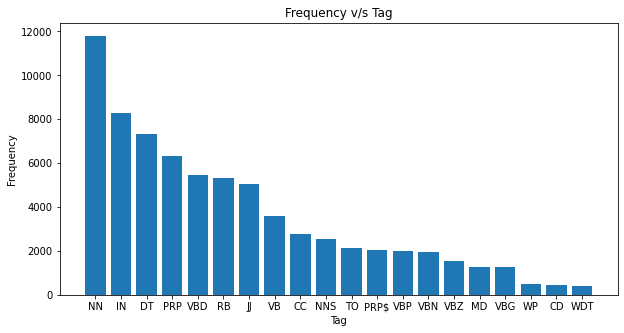

In [24]:
# Analyzing frequency of all the tags

tag_to_freq = {}

for tag in tagged_data:
    if(tag[1] in tag_to_freq):
        tag_to_freq[tag[1]] += 1
    else:
        tag_to_freq[tag[1]] = 1

tags = sorted(tag_to_freq.items(), key=lambda x: x[1], reverse=True)[:20]   # Displaying only 20 most frequent tags
x, y = zip(*tags)
plt.bar(x, y)
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.title("Frequency v/s Tag")
plt.show()
